<a href="https://colab.research.google.com/github/Rauloigs/econometria/blob/main/tarea1_a01203797.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import f

In [ ]:
%load_ext autoreload
%autoreload 2

# Matplot lib / not necessary here in colab
%matplotlib inline
import tarea_uno_eco as tue

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


¡Buena pregunta! Estás en el camino correcto.

La diferencia clave entre el CAPM y el modelo de Fama-French radica en las variables que se incluyen en la regresión para explicar los rendimientos.

* **CAPM:**  Utiliza solo el exceso de rendimiento del mercado como factor explicativo, además de la tasa libre de riesgo.
* **Fama-French:** Añade factores adicionales al exceso de rendimiento del mercado, como el tamaño de la empresa (SMB, Small Minus Big) y la relación valor contable-valor de mercado (HML, High Minus Low).

En el código que me muestras, estás utilizando `excess_market_returns` como variable explicativa, lo que corresponde al modelo CAPM.

Para implementar el modelo de Fama-French, tendrías que **añadir las variables SMB y HML a tu `exp_var`**.  

Por ejemplo, si tu DataFrame tuviera las columnas `SMB` y `HML`, el código para Fama-French se vería así:

```python
# Crear una matriz o DataFrame con las variables explicativas (Fama-French)
exp_var = banks[['excess_returns', 'risk_free_rate', 'excess_market_returns', 'SMB', 'HML']]

exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(banks['market_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())
```

**Importante:** El número de empresas (`Num_firms`) generalmente no se incluye como factor en el modelo de Fama-French. Los factores SMB y HML ya capturan información sobre el tamaño y la relación valor contable-valor de mercado de las empresas.

Recuerda que para aplicar Fama-French necesitas tener los datos de SMB y HML disponibles en tu DataFrame.


## 1. Análisis de datos.
La fuente de datos es:

In [ ]:
fama_data = pd.read_csv("fama_data.csv")
fama_data.set_index("year", inplace=True)
fama_data.index.name = None
fama_data.replace(-99.999, np.nan, inplace=True)
print(fama_data.isna().sum().sum())
print(fama_data.shape)
fama_data.head(3)

1029
(4753, 7)


,industry,Num_firms,weighted_returns,market_returns,risk_free_rate,excess_returns,excess_market_returns
1927,_aero,1,156.17,38.24,NaN,NaN,NaN
1927,_agric,3,26.23,38.24,NaN,NaN,NaN
1927,_autos,40,64.84,38.24,NaN,NaN,NaN


**industry:** Representa la industria a la que pertenece la cartera de acciones. En tu ejemplo, vemos industrias como _aero (aeroespacial), _agric (agricultura) y _autos (automóviles).

**Num_firms:** Indica el número de empresas que componen la cartera de acciones para esa industria en particular.

**weighted_returns:** Muestra los rendimientos ponderados de la cartera de acciones para esa industria. Estos rendimientos suelen estar ponderados por la capitalización de mercado de cada empresa en la cartera, lo que significa que las empresas más grandes tienen una mayor influencia en el rendimiento general de la cartera.

**market_returns:** Representa los rendimientos del mercado en general durante el mismo período. Esto se utiliza como punto de referencia para comparar el rendimiento de las carteras de la industria con el rendimiento del mercado en su conjunto.

**risk_free_rate:** Es la tasa de rendimiento de un activo libre de riesgo, como los bonos del Tesoro de Estados Unidos a corto plazo. Se utiliza para calcular el exceso de rendimiento de las carteras, es decir, el rendimiento que excede la tasa libre de riesgo.

**excess_returns:** Muestra el exceso de rendimiento de la cartera de la industria, calculado como weighted_returns - risk_free_rate.

**excess_market_returns:** Representa el exceso de rendimiento del mercado en general, calculado como market_returns - risk_free_rate.

## 2. Importación y Limpieza de Datos:

Importar los datos seleccionados a una herramienta de análisis como Stata, R o Python.

Realizar una limpieza de datos que incluya:
- -99.999=dato inexistente
- Elimina los datos inexistentes al momento de analizar data.

In [ ]:
# Eliminar filas con cualquier valor nulo
fama_data.dropna(inplace=True)
print(fama_data.shape)
print(fama_data.isna().sum().sum())
fama_data.head(3)

(4410, 7)
0


,industry,Num_firms,weighted_returns,market_returns,risk_free_rate,excess_returns,excess_market_returns
1934,_aero,7,3.34,-26.29,0.23,3.11,-26.52
1934,_agric,2,33.40,-26.29,0.23,33.17,-26.52
1934,_autos,44,-1.43,-26.29,0.23,-1.66,-26.52


## 3. Análisis Descriptivo:

Realizar un análisis descriptivo de los datos, incluyendo:

### 3.1.

Escoge 3 industries de las cuales se tiene data (por lo menos) desde el año 1930. Ilustra la series de tiempo de los "weighted returns"  y el "market returns". ¿Si el retorno de una industria es menor que la economía agregada, para qué invertiríamos en ella?

**voy a escoger** _banks, _chems, _mines. Así que creare un df por cada industria y voy a mostrar el retorno de weighted_returns vs market_returns para contestar

**Respuesta**

*invertiriamos en ella (1) para intentar ganarle al mercado, sin embargo no a largo plazo, sino es periodos donde exista un catalizador que supere al mercado, (2) invertiriamos en ella si es parte de una mezcla (un portafolio) de otros activos que buscan igualar o generar alfa respecto al mercado, (3) o quiza somos un inversionista institucional e invertiríamos en ella por diversos intereses.*

In [ ]:
# crear df banks
banks = fama_data[fama_data['industry'] == '_banks'].copy()
banks.drop('industry', axis=1, inplace=True)

# crear df chems
chems = fama_data[fama_data['industry'] == '_chems'].copy()
chems.drop('industry', axis=1, inplace=True)

# crear df mines
mines = fama_data[fama_data['industry'] == '_mines'].copy()
mines.drop('industry', axis=1, inplace=True)

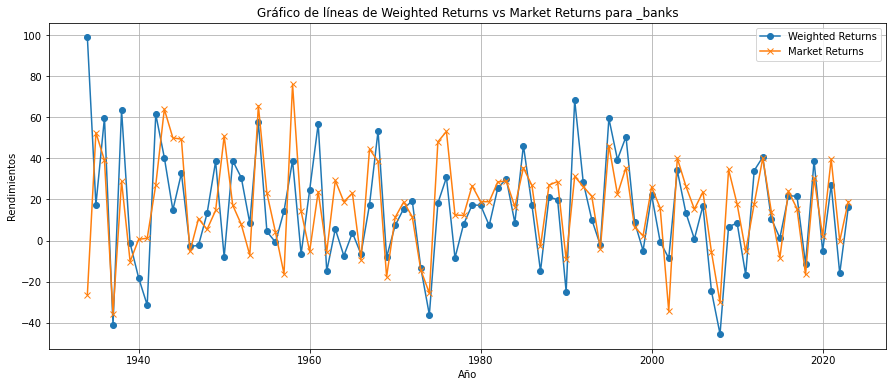

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(banks.index, banks['weighted_returns'], label='Weighted Returns', marker='o')
plt.plot(banks.index, banks['market_returns'], label='Market Returns', marker='x')
plt.xlabel('Año')
plt.ylabel('Rendimientos')
plt.title('Gráfico de líneas de Weighted Returns vs Market Returns para _banks')
plt.legend()
plt.grid(True)
plt.show()

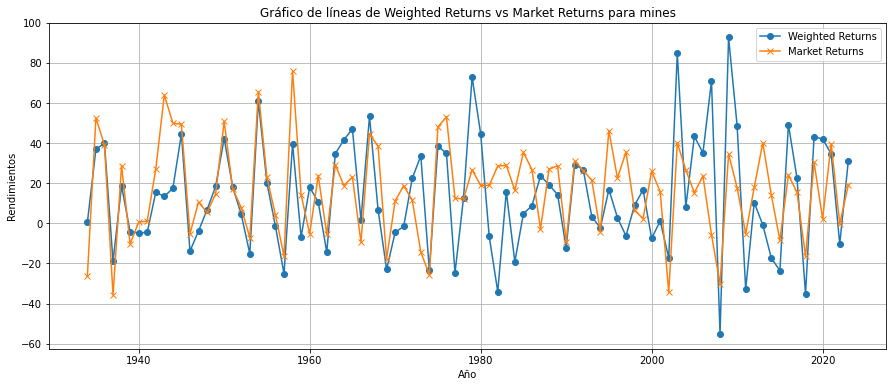

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(mines.index, mines['weighted_returns'], label='Weighted Returns', marker='o')
plt.plot(mines.index, mines['market_returns'], label='Market Returns', marker='x')
plt.xlabel('Año')
plt.ylabel('Rendimientos')
plt.title('Gráfico de líneas de Weighted Returns vs Market Returns para mines')
plt.legend()
plt.grid(True)
plt.show()

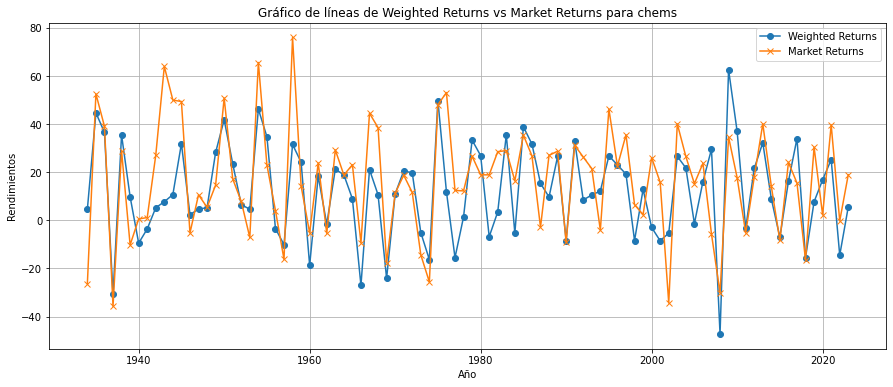

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(chems.index, chems['weighted_returns'], label='Weighted Returns', marker='o')
plt.plot(chems.index, chems['market_returns'], label='Market Returns', marker='x')
plt.xlabel('Año')
plt.ylabel('Rendimientos')
plt.title('Gráfico de líneas de Weighted Returns vs Market Returns para chems')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Aplica la función calcular_indice al DataFrame _banks
tue.calcular_indice(banks, 'weighted_returns', 1)
tue.calcular_indice(banks, 'market_returns', 1)

# Aplica la función calcular_indice al DataFrame _mines
tue.calcular_indice(mines, 'weighted_returns', 1)
tue.calcular_indice(mines, 'market_returns', 1)

# Aplica la función calcular_indice al DataFrame _chems
tue.calcular_indice(chems, 'weighted_returns', 1)
tue.calcular_indice(chems, 'market_returns', 1)

#banks.head()

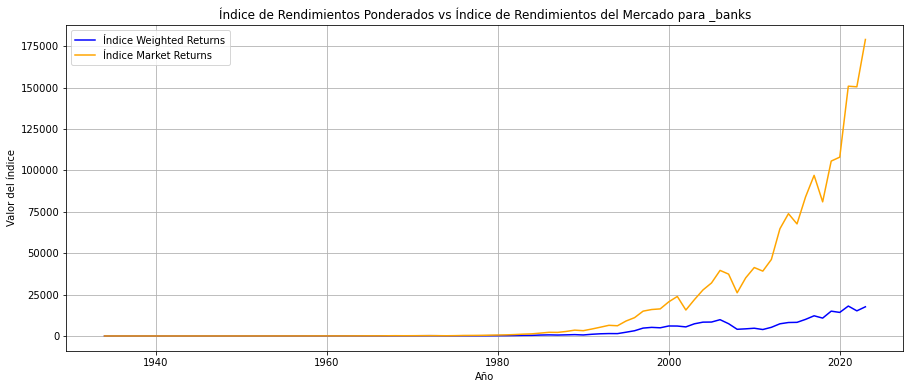

In [ ]:
# Filtrar datos a partir del año 2000
# banks = banks[_banks.index >= 2000]

plt.figure(figsize=(15, 6))
plt.plot(banks['indice_weighted_returns'], label='Índice Weighted Returns', color='blue')
plt.plot(banks['indice_market_returns'], label='Índice Market Returns', color='orange')
plt.xlabel('Año')
plt.ylabel('Valor del índice')
plt.title('Índice de Rendimientos Ponderados vs Índice de Rendimientos del Mercado para _banks')
plt.legend()
plt.grid(True)
plt.show()

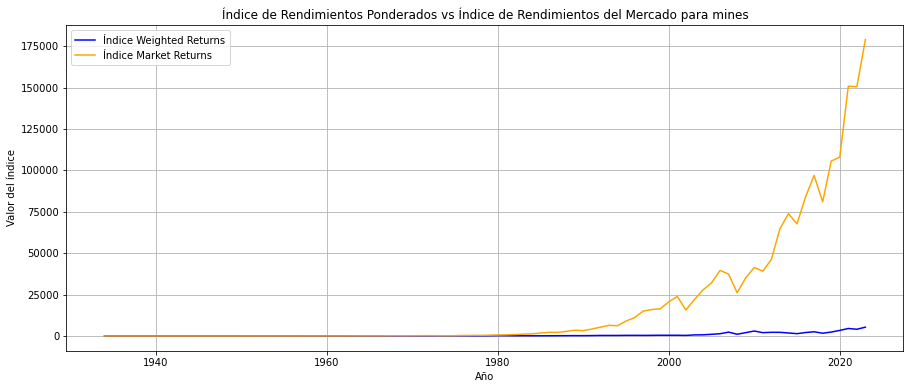

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(mines['indice_weighted_returns'], label='Índice Weighted Returns', color='blue')
plt.plot(mines['indice_market_returns'], label='Índice Market Returns', color='orange')
plt.xlabel('Año')
plt.ylabel('Valor del índice')
plt.title('Índice de Rendimientos Ponderados vs Índice de Rendimientos del Mercado para mines')
plt.legend()
plt.grid(True)
plt.show()

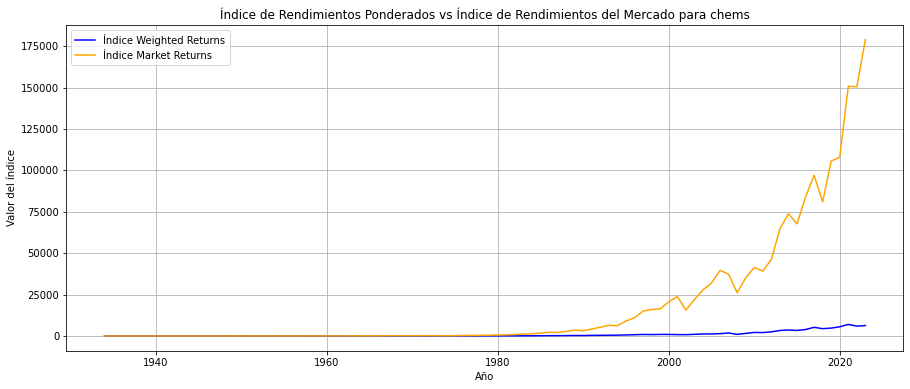

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(chems['indice_weighted_returns'], label='Índice Weighted Returns', color='blue')
plt.plot(chems['indice_market_returns'], label='Índice Market Returns', color='orange')
plt.xlabel('Año')
plt.ylabel('Valor del índice')
plt.title('Índice de Rendimientos Ponderados vs Índice de Rendimientos del Mercado para chems')
plt.legend()
plt.grid(True)
plt.show()

### 3.2

Con las mismas 3 industrias, ilustra las series de tiempo de los excess returns en conjunto con el "excess market return". ¿Por qué la series incluida ahora no nos ilustra la misma serie de patrones que la figura pasada?

**Respuesta**
*Para mi es el mismo patrón, solo ahora se ven más pequeños porque estamos restando el risk_free de ambos. El patrón es el mismo - el risk free rate*

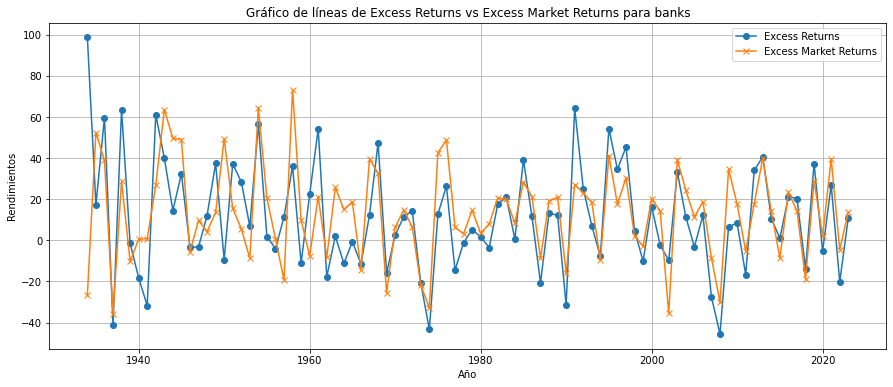

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(banks.index, banks['excess_returns'], label='Excess Returns', marker='o')
plt.plot(banks.index, banks['excess_market_returns'], label='Excess Market Returns', marker='x')
plt.xlabel('Año')
plt.ylabel('Rendimientos')
plt.title('Gráfico de líneas de Excess Returns vs Excess Market Returns para banks')
plt.legend()
plt.grid(True)
plt.show()

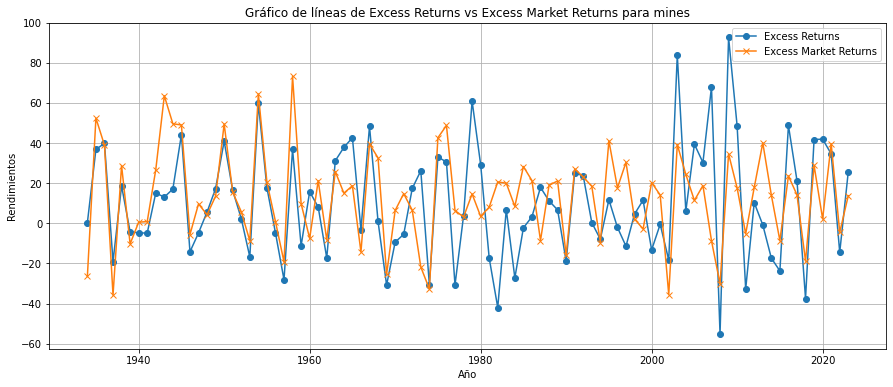

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(banks.index, mines['excess_returns'], label='Excess Returns', marker='o')
plt.plot(banks.index, mines['excess_market_returns'], label='Excess Market Returns', marker='x')
plt.xlabel('Año')
plt.ylabel('Rendimientos')
plt.title('Gráfico de líneas de Excess Returns vs Excess Market Returns para mines')
plt.legend()
plt.grid(True)
plt.show()

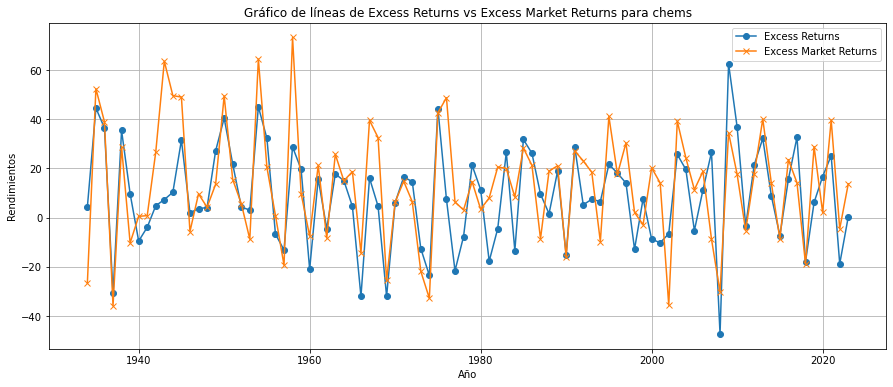

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(banks.index, chems['excess_returns'], label='Excess Returns', marker='o')
plt.plot(banks.index, chems['excess_market_returns'], label='Excess Market Returns', marker='x')
plt.xlabel('Año')
plt.ylabel('Rendimientos')
plt.title('Gráfico de líneas de Excess Returns vs Excess Market Returns para chems')
plt.legend()
plt.grid(True)
plt.show()

### 3.3
Ilustra el histograma de retornos en exceso a nivel industria para los años 1930, 1950, 1970, 1990, 2010. ¿Qué le ha pasado a la distribución de retornos con el tiempo?

**Respuesta**

*han sido muy diversos, en cuanto a que van de extremos negativo a extremo positivo*

In [ ]:
# Seleccionar los años
years = [1930, 1950, 1970, 1990, 2010]

# Filtrar los datos para los años seleccionados
excess_returns_selected_years_banks = banks[(banks.index.isin(years))]['excess_returns']

# Filtrar los datos para los años seleccionados
excess_returns_selected_years_mines = mines[(banks.index.isin(years))]['excess_returns']

# Filtrar los datos para los años seleccionados
excess_returns_selected_years_chems = chems[(banks.index.isin(years))]['excess_returns']

excess_returns_selected_years_banks.head()


1950    -9.38
1970     2.46
1990   -31.57
2010     8.33
Name: excess_returns, dtype: float64

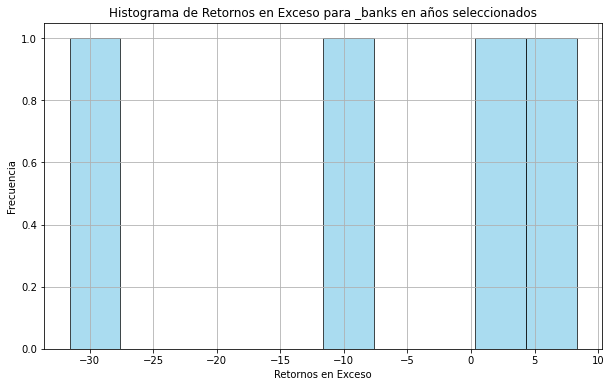

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(excess_returns_selected_years_banks, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Retornos en Exceso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos en Exceso para _banks en años seleccionados')
plt.grid(True)
plt.show()

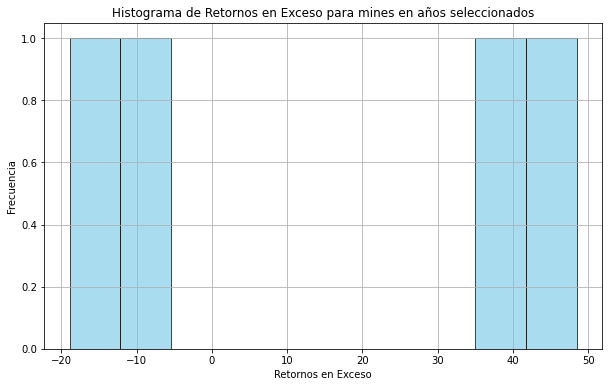

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(excess_returns_selected_years_mines, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Retornos en Exceso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos en Exceso para mines en años seleccionados')
plt.grid(True)
plt.show()

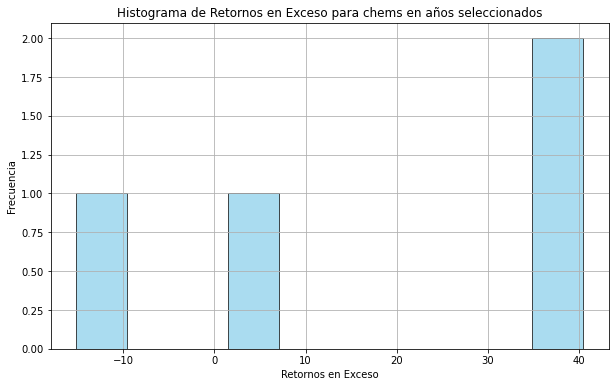

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(excess_returns_selected_years_chems, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Retornos en Exceso')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos en Exceso para chems en años seleccionados')
plt.grid(True)
plt.show()

## 4. Regresiones:

### 4.1

Yo quiero calcular las betas de CAPM a nivel industria, pero CAPM se trata de una firma en particular. ¿Si calculo la beta a nivel industria, por qué es válido y cuál es la relación entre la beta de la industria y la beta de las empresas que son parte de la misma?

**Respuesta**

*Es valido porque una industria (por ejemplo banks) sería como el comportamiento de un portafolio diferente al mercado, por lo tanto es comparable respecto al mercado, por lo que tenemos el excess returns que necesitamos en la fórmula de CAPM*

### 4.2
Corre la regresión de CAPM para las tres industrias que habías escogido en la primera parte de la tarea. Reporta los valores de las betas a 3 lugares decimales e interpreta lo que dicen. ¿Qué significa el hecho de que tienen magnitudes distintas? ¿Y si dos tienen una beta positiva y la otra tiene una beta negativa, qué implica esto al momento de diseñar una cartera?

**Respuesta**

Hay dos betas negativas y una positiva La beta muestra el comportamiento de un activo respecto al mercado. Beta de 1 se comporta igual que el mercado, beta de -1 hace lo puesto y una beta mayor a uno o menor que -1 hace lo mismo pero en exceso al mercado.Aquí las betas que obtuve para banks como ejemplo.

* **Beta de `risk_free_rate`:** -0.9064
* **Beta de `excess_market_returns`:** 0.6644

¿Qué implica esto al diseñar una cartera?

* **Diversificación:** Los activos con betas negativas pueden ayudar a diversificar la cartera,compensando las perdidas o ganancias de otros activos.
* **Cobertura:** Los activos con betas negativas pueden actuar como coberturas
* **Estrategias de inversión:**  Las betas negativas pueden ser útiles en diferentes estrategias de inversión. Por ejemplo, en una estrategia de "market neutral", se busca construir una cartera con una beta general cercana a cero, lo que significa que la cartera no se ve afectada por los movimientos del mercado. Esto se puede lograr combinando activos con betas positivas y negativas. También he llego a ver por ejemplo ETFs que son -3X Bull que buscan replicar por 3 los rendimientos del mercado a la inversa.

### Nota para mí sobre el análisis de banks parte por parte

**Resumen de los resultados:**

* **Variable dependiente:** `excess_returns` (exceso de rendimiento de la industria bancaria)
* **Variables independientes:**
    * `excess_market_returns` (exceso de rendimiento del mercado)
    * `risk_free_rate` (tasa libre de riesgo)
* **R-cuadrado:** 0.359
* **R-cuadrado ajustado:** 0.344
* **F-estadístico:** 24.38
* **Probabilidad (F-estadístico):** 3.91e-09

**Interpretación de los coeficientes:**

* **`const` (intercepto):** 5.3438.  Este coeficiente representa el alfa de la industria bancaria. Un alfa positivo sugiere que, en promedio, la industria bancaria ha generado un rendimiento superior al esperado por el modelo CAPM. Sin embargo, el valor p (0.157) indica que este coeficiente no es estadísticamente significativo al nivel de confianza del 95%.
* **`excess_market_returns`:** 0.6644. Este coeficiente representa el beta de la industria bancaria. Un beta de 0.6644 indica que, en promedio, los rendimientos de la industria bancaria se mueven en la misma dirección que los rendimientos del mercado, pero con una menor volatilidad (un 66.44% de la volatilidad del mercado). El valor p (0.000) indica que este coeficiente es estadísticamente significativo al nivel de confianza del 95%.
* **`risk_free_rate`:** -0.9064. Este coeficiente indica que un aumento en la tasa libre de riesgo se asocia con una disminución en el exceso de rendimiento de la industria bancaria. Sin embargo, el valor p (0.217) indica que este coeficiente no es estadísticamente significativo al nivel de confianza del 95%.

**Interpretación del R-cuadrado:**

* El R-cuadrado de 0.359 indica que el modelo explica el 35.9% de la variabilidad en el exceso de rendimiento de la industria bancaria.

**Interpretación del F-estadístico:**

* El F-estadístico de 24.38 y su valor p (3.91e-09) indican que el modelo en su conjunto es estadísticamente significativo.

**Otras consideraciones:**

* Los valores de Omnibus, Jarque-Bera (JB) y Kurtosis sugieren que los residuos del modelo no se distribuyen normalmente. Esto podría afectar la validez de las inferencias estadísticas.
* El modelo CAPM tiene limitaciones y puede no ser la mejor herramienta para explicar los rendimientos de la industria bancaria. Otros factores, como el tamaño de la empresa y la relación valor contable-valor de mercado (como en el modelo de Fama-French), podrían mejorar la precisión del modelo.

En general, el modelo CAPM sugiere que la industria bancaria tiene un beta de 0.6644, lo que indica una volatilidad moderada en relación con el mercado. Sin embargo, el modelo no proporciona evidencia suficiente para concluir que la industria ha generado un rendimiento superior al esperado por el modelo (alfa no significativo).

**sobre el p-value**

En el contexto de una regresión, la hipótesis nula para cada coeficiente es que el coeficiente es igual a cero, lo que significa que la variable correspondiente no tiene efecto sobre la variable dependiente.
Un valor p menor que 0.05 significa que hay menos del 5% de probabilidad de observar los resultados obtenidos si la hipótesis nula fuera cierta. En este caso, rechazamos la hipótesis nula y concluimos que el coeficiente es estadísticamente significativo al nivel de confianza del 95%. Esto significa que hay suficiente evidencia para concluir que la variable correspondiente tiene un efecto sobre la variable dependiente.
Por otro lado, un valor p mayor que 0.05 significa que no hay suficiente evidencia para rechazar la hipótesis nula. En este caso, no podemos concluir que la variable correspondiente tenga un efecto sobre la variable dependiente.
En resumen, un valor p menor que 0.05 indica que el coeficiente es estadísticamente significativo al nivel de confianza del 95%, mientras que un valor p mayor que 0.05 indica que el coeficiente no es estadísticamente significativo.


**analizamos banks**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
# exp_var = banks[['weighted_returns', 'market_returns', 'risk_free_rate', 'excess_market_returns']]
exp_var = banks[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(banks['excess_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     24.38
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.91e-09
Time:                        16:02:18   Log-Likelihood:                -402.08
No. Observations:                  90   AIC:                             810.2
Df Residuals:                      87   BIC:                             817.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.34

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


****ahora mines****

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = mines[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(mines['excess_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     21.03
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.55e-08
Time:                        16:02:18   Log-Likelihood:                -409.47
No. Observations:                  90   AIC:                             824.9
Df Residuals:                      87   BIC:                             832.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.30

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


****finalmente chems****

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = chems[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(chems['excess_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     45.30
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.29e-14
Time:                        16:02:18   Log-Likelihood:                -364.76
No. Observations:                  90   AIC:                             735.5
Df Residuals:                      87   BIC:                             743.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.17

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4.3
Ahora calcula la mismas betas usando los "weighted returns" y "market returns" en vez de las ecuaciones en exceso. Reporta los coeficientes nuevos. ¿Qué problema con esta especificación de la data explica que los estimados de las betas sean distintas?

* **Beta de `risk_free_rate`:** 0.6644
* **Beta de `excess_market_returns`:** 0.0936

En principio las betas son distintas porque la variable dependiente cambia. El modelo CAPM esta hecho para predecir el retorno en execeso de un activo a través del risk free rate y el excess market returns. Cuando utilizamos los weighted returns o el market return, estamos utilizando (1) por el lado del excess market reuturn solo estamos restando el risk free rate y (2) weighted returns pienso que no tiene un efecto tan negativo dado que solo sería restarle el risk free rate para que sea el excess.


**primero con weighted returns para banks**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = banks[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(banks['weighted_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       weighted_returns   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     22.47
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.35e-08
Time:                        16:02:18   Log-Likelihood:                -402.08
No. Observations:                  90   AIC:                             810.2
Df Residuals:                      87   BIC:                             817.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.34

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**ahora con market returns para banks**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = banks[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(banks['market_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         market_returns   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.095e+16
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:02:18   Log-Likelihood:                 1112.7
No. Observations:                  90   AIC:                            -2219.
Df Residuals:                      87   BIC:                            -2212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.884e-

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**weighted returns para mines**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = mines[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(mines['weighted_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       weighted_returns   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     20.18
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           6.31e-08
Time:                        16:02:18   Log-Likelihood:                -409.47
No. Observations:                  90   AIC:                             824.9
Df Residuals:                      87   BIC:                             832.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.30

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**market returns para mines**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = mines[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(mines['market_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         market_returns   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.095e+16
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:02:18   Log-Likelihood:                 1112.7
No. Observations:                  90   AIC:                            -2219.
Df Residuals:                      87   BIC:                            -2212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.884e-

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**weighted returns para chems**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = chems[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(chems['weighted_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       weighted_returns   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     41.89
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.81e-13
Time:                        16:02:18   Log-Likelihood:                -364.76
No. Observations:                  90   AIC:                             735.5
Df Residuals:                      87   BIC:                             743.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.17

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**market reuturns para chems**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = chems[['excess_market_returns', 'risk_free_rate']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(chems['market_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         market_returns   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.095e+16
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:02:18   Log-Likelihood:                 1112.7
No. Observations:                  90   AIC:                            -2219.
Df Residuals:                      87   BIC:                            -2212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.884e-

### 4.4
Crea variables para los siguientes periodos: 1927-1960, 1961-1990, y 1991-presente.  Correa una regresión de CAPM, pero ahora incluye un control para estos 3 periodos y su interacción con "excess market returns". ¿Qué significa el coeficiente de "excess market returns" con el indicador de "1961-1990"? ¿Este coeficiente es estadísticamente diferente a 0  (para cada una de las 3 industrias) a 95% de concianza y si lo es qué significaría?  ¿Calcula el "joint significance" de los indicadores de periodos a un nivel e confianza de 99% y si fuesen "jointly significant" qué implicaría?

**Respuesta**

durante el periodo 1961-1990, la sensibilidad del *exceso de rendimiento de banks* al *exceso de rendimiento del mercado* disminuyó en 6.81 unidades en comparación con el periodo de referencia.

**Interpretación de los resultados "joint significant"**

* **Bancos:** El valor p (0.029) es menor que 0.01. Rechazamos la hipótesis nula. Hay suficiente evidencia para concluir que la relación entre el exceso de rendimiento de banks y el exceso de rendimiento del mercado es diferente.

* **Químicos:** El valor p (0.507) es mayor que No rechazamos la hipótesis nula para chems. No hay suficiente evidencia para concluir que la relación entre el exceso de rendimiento de chems y el exceso de rendimiento del mercado sea diferente.

* **Minería:** El valor p (0.577) es mayor que 0.01. No rechazamos la hipótesis nula para mines. No hay suficiente evidencia para concluir que la relación entre el exceso de rendimiento de mines y el exceso de rendimiento del mercado sea diferente.

**Conclusión:**

Solo para banks, los indicadores de periodos son "jointly significant" al 99% de confianza.


In [ ]:
# import statsmodels.formula.api as sm

# Define the periods
periods = [(1927, 1960), (1961, 1990), (1991, 2023)]

# Create dummy variables and interactions for each DataFrame
for df in [banks, chems, mines]:
    for start, end in periods:
        # Generate column name
        col_name = f"period_{start}_{end}"

        # Create dummy variable for the current period
        df[col_name] = np.where((df.index >= start) & (df.index <= end), 1, 0)

        # Generate interaction term
        df[f"{col_name}_excess_market_returns"] = df[col_name] * df["excess_market_returns"]

# Define the regression formula
formula = (
    "excess_returns ~ excess_market_returns + period_1927_1960 + period_1961_1990 + "
    "period_1991_2023 + period_1927_1960_excess_market_returns + "
    "period_1961_1990_excess_market_returns + period_1991_2023_excess_market_returns"
)

# Run the regressions and print summaries
for df, name in zip([banks, chems, mines], ["banks", "chems", "mines"]):
    model = smf.ols(formula, data=df).fit()
    print(f"Regression results for {name}:")
    print(model.summary())

    # Perform F-test for joint significance of dummy variables
    f_test = model.f_test(
        "period_1927_1960 = period_1961_1990 = period_1991_2023 = 0"
    )
    print(f"\nF-test for joint significance of period dummies in {name}:")
    print(f"F-statistic: {f_test.fvalue[0][0]:.2f}")
    print(f"P-value: {f_test.pvalue:.3f}\n")

Regression results for banks:
                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     13.08
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           2.04e-09
Time:                        16:02:18   Log-Likelihood:                -396.19
No. Observations:                  90   AIC:                             804.4
Df Residuals:                      84   BIC:                             819.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [ ]:
# Define null hypothesis
null_hypothesis = "period_1927_1960 = period_1961_1990 = period_1991_2023 = 0"

# Perform F-test for each model
for df, name in zip([banks, chems, mines], ["banks", "chems", "mines"]):
    # Modelo no restringido (con variables dummy)
    model_unrestricted = smf.ols(formula, data=df).fit()

    # Modelo restringido (sin variables dummy)
    formula_restricted = "excess_returns ~ excess_market_returns"
    model_restricted = smf.ols(formula_restricted, data=df).fit()

    # Calcular F-statistic y p-value manualmente
    ssr_restricted = model_restricted.ssr
    ssr_unrestricted = model_unrestricted.ssr
    df_restricted = model_restricted.df_resid
    df_unrestricted = model_unrestricted.df_resid

    f_statistic = ((ssr_restricted - ssr_unrestricted) / (df_restricted - df_unrestricted)) / (ssr_unrestricted / df_unrestricted)
    p_value = f.sf(f_statistic, df_restricted - df_unrestricted, df_unrestricted)

    print(f"F-test for joint significance of period dummies in {name}:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"P-value: {p_value:.3f}\n")

F-test for joint significance of period dummies in banks:
F-statistic: 3.36
P-value: 0.013

F-test for joint significance of period dummies in chems:
F-statistic: 0.83
P-value: 0.507

F-test for joint significance of period dummies in mines:
F-statistic: 0.73
P-value: 0.577



### 4.5
Corre la regresión de CAPM para todas las industria e ilustra el histograma de las betas estimadas. Vuelve a estimar la regresión para los tres periodos (1927-1960, 1961-1990, y 1991-presente) e ilustra el histograma de las betas estimadas para los tres periodos. Interpreta el cambio de la distribución.

**Rspuesta**

**Periodo 1927-1960:** La mayoría de las betas se concentran entre 0.2 y 1, con una cola derecha más pesada. Las industrias tenían una volatilidad moderada en relación con el mercado durante este periodo ya que se encuentran debajo de uno muy concentradas.

**Periodo 1961-1990:** Durante este periódo las betas se desplazan ligeramente hacia la izquierda, con una mayor concentración de industrias con betas entre 0 y 0.5. Las industrias se volvieron menos sensibles a las fluctuaciones del mercado durante este periodo.

**Periodo 1991-presente:** La distribución de las betas se vuelve más concentrada alrededor de 1, con menos industrias con betas extremas (muy bajas o muy altas).

**Conclusión**
Las induatrías están teneiendo una tendencía más moderada al mercado (beta hacía 1) esto podría indicar menores spreads en market excess return? Podría decir que es más complejo crear un portafolio de cobertura ante el mercado?

In [ ]:
# Apply the function `estimate_capm_params` to each group of industries and years
capm_results = fama_data.groupby("industry").apply(tue.estimate_capm_params)

# Plot the histogram of beta values
chart1 = alt.Chart(capm_results.reset_index()).mark_bar().encode(
    x=alt.X('beta', bin=True),
    y=alt.Y('count()'),
    tooltip=[alt.Tooltip('beta', bin=True), 'count()']
).properties(title='Histograma de Betas para todas las industrias').interactive()

# Split the data into three periods
fama_data_1927_1960 = fama_data[fama_data.index <= 1960]
fama_data_1961_1990 = fama_data[(fama_data.index >= 1961) & (fama_data.index <= 1990)]
fama_data_1991_present = fama_data[fama_data.index >= 1991]

# Calculate CAPM parameters for each period
capm_results_1927_1960 = fama_data_1927_1960.groupby("industry").apply(tue.estimate_capm_params)
capm_results_1961_1990 = fama_data_1961_1990.groupby("industry").apply(tue.estimate_capm_params)
capm_results_1991_present = fama_data_1991_present.groupby("industry").apply(tue.estimate_capm_params)

# Plot histograms of beta values for each period
chart2 = alt.Chart(capm_results_1927_1960.reset_index()).mark_bar().encode(
    x=alt.X('beta', bin=True),
    y=alt.Y('count()'),
    tooltip=[alt.Tooltip('beta', bin=True), 'count()']
).properties(title='Histograma de Betas para el periodo 1927-1960').interactive()

chart3 = alt.Chart(capm_results_1961_1990.reset_index()).mark_bar().encode(
    x=alt.X('beta', bin=True),
    y=alt.Y('count()'),
    tooltip=[alt.Tooltip('beta', bin=True), 'count()']
).properties(title='Histograma de Betas para el periodo 1961-1990').interactive()

chart4 = alt.Chart(capm_results_1991_present.reset_index()).mark_bar().encode(
    x=alt.X('beta', bin=True),
    y=alt.Y('count()'),
    tooltip=[alt.Tooltip('beta', bin=True), 'count()']
).properties(title='Histograma de Betas para el periodo 1991-presente').interactive()

# Combine the charts
chart = chart1 & chart2 & chart3 & chart4

# Save the chart
## chart.save('histogramas_betas.json')

chart

alt.VConcatChart(...)

### 4.6
Ahora vamos a asumir que el modelo correcto de factores incluye el número de firmas en la industria. Calcula las betas para "excess market returns" para las tres industrias que escogiste. ¿Cual de las betas son apropiadas para nuestro análisis, las nuevas o las que primero calculamos?  ¿Si el coeficiente del número de firmas no es estadísticamente significante a un nivel de confianza deseado, debemos incluir este factor en la regresión? ¿El R cuadrado subió entre la primera regresión de CAPM y la nueva con el número de firmas en la industria, eso me debe importar?

**Respuesta**

para el caso de banks, como ya lo podíamos imaginar... El valor p asociado al coeficiente de Num_firms es 0.440. Este valor es mayor que 0.05, lo que significa que no podemos rechazar la hipótesis nula de que el coeficiente es igual a cero. No hay suficiente evidencia estadística para concluir que el número de empresas en la industria tiene un efecto significativo sobre el exceso de rendimiento.

Su beta fue de -0.0073 lo que quiere decir que los exesos de retorno de banks son bajamente sensibles a los cambios en el Número de empresas.

**En cuanto al R²**

- Modelo 1: Sin Num_firms (R² = 0.359)
- Modelo 2: Con Num_firms (R² = 0.364)

Partiendo de que nn R² más alto indica que el modelo explica una mayor proporción de la variabilidad en los datos, el Modelo 2 tiene un R² ligeramente mayor que el Modelo 1, por lo tanto explica un poco más de la variabilidad en el exceso de rendimiento de la industria que el Modelo 1. Pero el coeficiente de Num_firms no fue estadísticamente significativo.

Incluir Num_firms en el modelo aumenta ligeramente el R², pero no aporta información relevante para explicar el exceso de rendimiento de la industria.

**analizamos banks**

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
# exp_var = banks[['weighted_returns', 'market_returns', 'risk_free_rate', 'excess_market_returns']]
exp_var = banks[['excess_market_returns', 'risk_free_rate', 'Num_firms']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(banks['excess_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     16.38
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           1.66e-08
Time:                        16:02:18   Log-Likelihood:                -401.76
No. Observations:                  90   AIC:                             811.5
Df Residuals:                      86   BIC:                             821.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.23

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


****ahora mines****

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = mines[['excess_market_returns', 'risk_free_rate', 'Num_firms']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(mines['excess_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     14.53
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           9.71e-08
Time:                        16:02:18   Log-Likelihood:                -408.76
No. Observations:                  90   AIC:                             825.5
Df Residuals:                      86   BIC:                             835.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.19

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


****finalmente chems****

In [ ]:
# Crear una matriz o DataFrame con las variables explicativas
exp_var = chems[['excess_market_returns', 'risk_free_rate', 'Num_firms']]

# Agregar una constante a la matriz de variables explicativas
exp_var = sm.add_constant(exp_var)

# Correr la regresión
lm = sm.OLS(chems['excess_returns'], exp_var).fit()

# Mostrar los resultados
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     29.89
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           2.47e-13
Time:                        16:02:19   Log-Likelihood:                -364.74
No. Observations:                  90   AIC:                             737.5
Df Residuals:                      86   BIC:                             747.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.18

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4.7
Usando las regresiones pasadas, estima el valor esperado de los retornos de cada una de sus empresas y calcula el residuo de la regresión. Ilustra el residuo de el retorno observado menos el estimado contra del tiempo. Interpreta el residuo en contra del tiempo.

**Respuesta**

Al analizar los gráficos, bbeservamos que los residuos parecen distribuirse de forma aleatoria en torno a cero en las 3 industries.

En algunos periodos se observan residuos positivos o negativos consecutivos, lo que sugiere que los modelos no están capturando completamente toda la variabilidad de los datos en esos periodos. Esto podría deberse a que hay otros factores que influyen en los rendimientos de las industrias, pero que no están incluidos en los modelos.

In [ ]:
# Define the industries to be included in the dataframe
industries = ["_banks", "_chems", "_mines"]

# Create a list of names for the industries
industry_names = ["banks", "chems", "mines"]

# Create a list of dataframes for each industry
industry_dfs = [fama_data[fama_data["industry"] == ind].copy() for ind in industries]

# Create a dictionary mapping industry names to their corresponding dataframes
industry_dataframes = {
    industry: fama_data[fama_data["industry"] == f"_{industry}"].copy()
    for industry in industry_names
}

# Fit the regression model for each industry
for industry in industry_names:
    # Add a constant to the dataframe
    industry_dataframes[industry] = sm.add_constant(industry_dataframes[industry])

    # Fit the regression model
    model = sm.OLS(
        industry_dataframes[industry]["excess_returns"],
        industry_dataframes[industry][
            ["const", "excess_market_returns", "Num_firms"]
        ],
    ).fit()

    # Get the coefficients
    coef = model.params

    # Calculate the expected returns
    industry_dataframes[industry]["expected_returns"] = (
        coef["const"]
        + coef["excess_market_returns"]
        * industry_dataframes[industry]["excess_market_returns"]
        + coef["Num_firms"] * industry_dataframes[industry]["Num_firms"]
    )

    # Calculate the residuals
    industry_dataframes[industry]["residuals"] = (
        industry_dataframes[industry]["excess_returns"]
        - industry_dataframes[industry]["expected_returns"]
    )

    # Print the results
    print(f"\nRegression with Num_firms for {industry}:")
    print(model.summary())

    # Create a new dataframe for the chart with the correct column name
    chart_df = industry_dataframes[industry].reset_index().copy()
    chart_df = chart_df.rename(columns={'index': 'year'})

    # Plot the residuals vs time
    chart = alt.Chart(chart_df).mark_circle().encode(
        x=alt.X('year', title='Año'),
        y=alt.Y('residuals', title='Residuos'),
        tooltip=['year', 'residuals']  # Add tooltip for better readability
    ).properties(
        title=f'Residuos vs Tiempo para {industry.capitalize()}'
    ).interactive()


Regression with Num_firms for banks:
                            OLS Regression Results                            
Dep. Variable:         excess_returns   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     23.65
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           6.30e-09
Time:                        16:02:19   Log-Likelihood:                -402.57
No. Observations:                  90   AIC:                             811.1
Df Residuals:                      87   BIC:                             818.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/raulgsi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
chart

alt.Chart(...)